# Article2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC



In [5]:
import pandas as pd

data = pd.read_excel("A:/chronic_kidney_disease1.1.xlsx")

data 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
data= data.replace('?',np.nan)


In [7]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
#formatting dataframe by replacing strings in int
replacements = {
    'poor' : 0.0,
    'good' : 1.0,
    'normal' : 1.0,
    'abnormal' : 0.0,
    'notpresent' : 0.0,
    'present' : 1.0,
    'yes' : 1.0,
    'no' : 0.0,
    'ckd' : 1.0,
    'ckd\t' : 1.0,
    'notckd' : 0.0
}
df_num = data.replace(replacements)
df_num

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# numerical

In [9]:
data1=df_num.drop(["sg","al","su","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane"],axis=1)
X = data1.loc[:, data1.columns != 'class']
X = X.apply(pd.to_numeric, errors='coerce')
data1=X.fillna(X.mean())

# nominal

In [10]:
data2=df_num.drop(["age","bp","bgr","bu","sc","sod","pot","hemo","wbcc","rbcc","pcv"],axis=1)
X1 = data2.loc[:, data2.columns != 'class']
X1 = X1.apply(pd.to_numeric, errors='coerce')
data2=X1.fillna(X1.mode().iloc[0])

In [11]:
data3=pd.concat([data1,data2], axis=1, join='inner')
y = df_num['class']


In [12]:
data4=pd.concat([data3,y], axis=1, join='inner')
data4

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
data4.isna().sum()

age      0
bp       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

<AxesSubplot:>

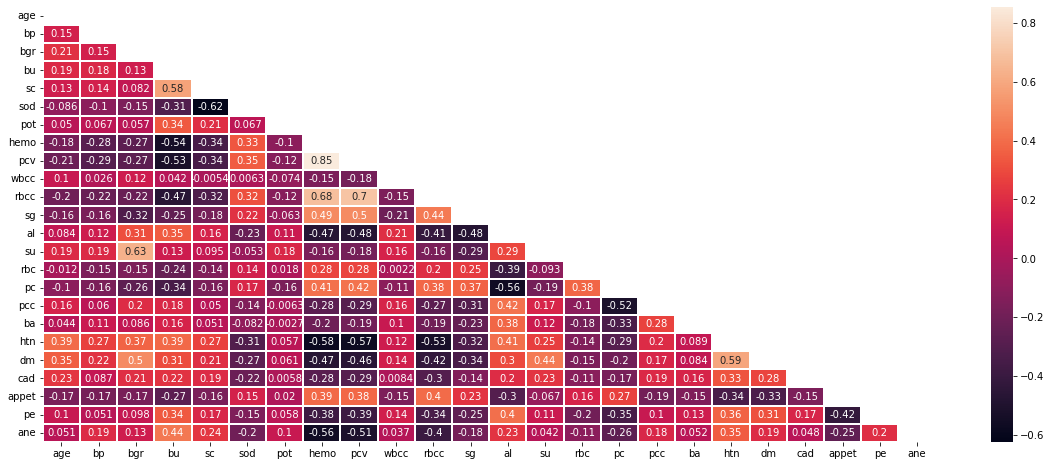

In [14]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(data3.corr()))
sns.heatmap(data3.corr(), annot=True, linewidths=0.2, mask=mask)

# Feature selection

In [15]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

Optimal number of features : 12


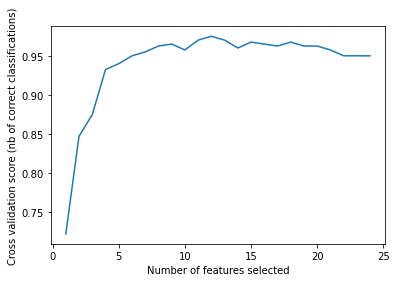

[ 9  6  8  7  1  5  1  1  3 10  1  4  1  1  1  1 11 12  1  1 13  1  1  2]


In [16]:
# rfecv for classification
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(data3, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print(rfecv.ranking_)

In [17]:
cols = list(data3.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(data3,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['hemo', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'ane'],
      dtype='object')


In [18]:
data3= data3[['hemo', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'ane']]
data5=pd.concat([data3,y], axis=1, join='inner')
data5


,hemo,sg,al,rbc,pc,pcc,ba,htn,dm,cad,appet,ane,class
0,15.4,1.020,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1,11.3,1.020,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,9.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,11.2,1.005,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,11.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15.7,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
396,16.5,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
397,15.8,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
398,14.2,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# outliers(enhencement)

In [19]:
def plotBoxPlot(df1, nRows, nGraphPerRow):
    track = [[0]*nGraphPerRow]*nRows
    columnNames = data5.columns
        
    fig, ax = plt.subplots(nrows=nRows, ncols=nGraphPerRow, figsize=(20,10))
       
    row, col, i = 0,0,0
    while i<(len(columnNames)):
        if col<=nGraphPerRow-1:
            sns.boxplot(data5[columnNames[i]],ax=ax[row][col])
            col+=1
        else:
            col=0
            row+=1
            i-=1
        i+=1
            
    for j in range(col,nGraphPerRow):
        fig.delaxes(ax[row][j])
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

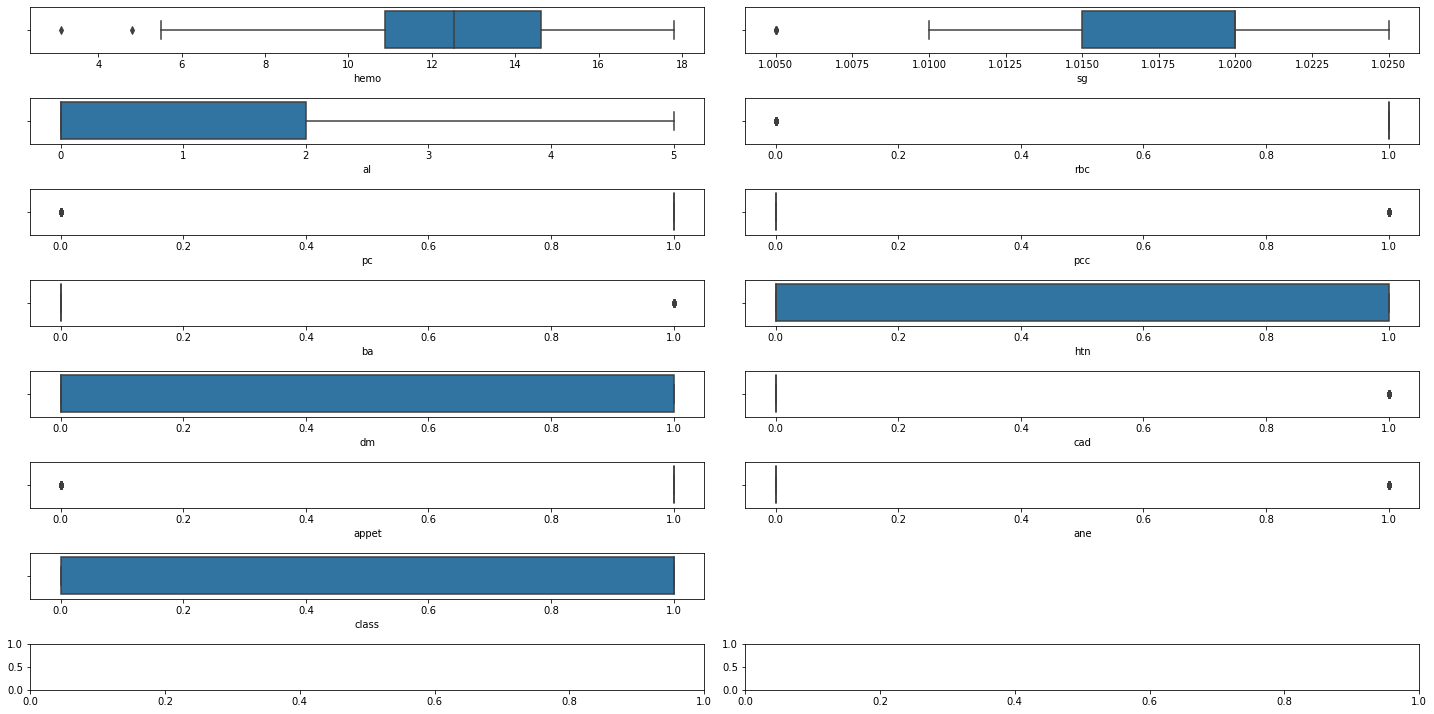

In [20]:
plotBoxPlot(data5,8,2)

In [21]:
 for k, v in data5.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data5)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column hemo outliers = 0.50%
Column sg outliers = 1.75%
Column al outliers = 0.25%
Column rbc outliers = 100.00%
Column pc outliers = 100.00%
Column pcc outliers = 100.00%
Column ba outliers = 100.00%
Column htn outliers = 0.00%
Column dm outliers = 0.00%
Column cad outliers = 100.00%
Column appet outliers = 100.00%
Column ane outliers = 100.00%
Column class outliers = 0.00%


In [22]:
import numpy as np
# IQR
Q1 = np.percentile(data5['hemo'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data5['hemo'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [23]:
print("Old Shape: ", data5.shape)
 
# Upper bound
upper = np.where(data5['hemo'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data5['hemo'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
data5.drop(upper[0], inplace = True)
data5.drop(lower[0], inplace = True)
data5.reset_index(inplace = True)
print("New Shape: ", data5.shape)

Old Shape:  (400, 13)
New Shape:  (398, 14)


In [24]:
import numpy as np
# IQR
Q1 = np.percentile(data5['sg'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data5['sg'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [25]:
print("Old Shape: ", data5.shape)
 
# Upper bound
upper = np.where(data5['sg'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data5['sg'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
data5.drop(upper[0], inplace = True)
data5.drop(lower[0], inplace = True)
data5.reset_index(inplace = True)
print("New Shape: ", data5.shape)

Old Shape:  (398, 14)
New Shape:  (391, 15)


In [26]:
data7=data5.drop(["index","level_0"],axis=1)
#data7=pd.concat([data7,y], axis=1, join='inner')
X1 = data7.drop("class", axis=1)
y1= data7["class"]
display(X1)
display(y1)


,hemo,sg,al,rbc,pc,pcc,ba,htn,dm,cad,appet,ane
0,15.4,1.020,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,11.3,1.020,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,11.6,1.010,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12.2,1.015,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
386,15.7,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
387,16.5,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
388,15.8,1.020,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
389,14.2,1.025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
386    0.0
387    0.0
388    0.0
389    0.0
390    0.0
Name: class, Length: 391, dtype: float64

# decision tree

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
modeldt =  DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
modeldt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [30]:
y_preddt = modeldt.predict(x_test)
y_preddt

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.])

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
CMDT=confusion_matrix(y_test,y_preddt)
CMDT=np.array(CMDT, dtype=int)
CMDT

array([[41,  2],
       [ 0, 75]])

<AxesSubplot:>

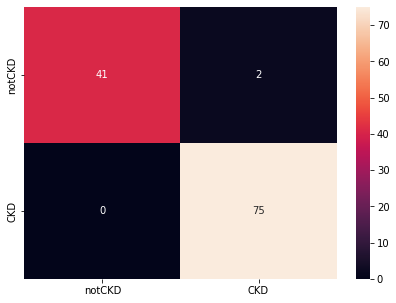

In [32]:

df_cm = pd.DataFrame(CMDT, index = [i for i in ["notCKD","CKD"]],
                         columns = [i for i in ["notCKD", "CKD"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [33]:
print(classification_report(y_test, y_preddt))


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        43
         1.0       0.97      1.00      0.99        75

    accuracy                           0.98       118
   macro avg       0.99      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118



In [34]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modeldt.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(modeldt.score(x_test,y_test)))

Training set score: 0.9744
Test set score: 0.9831


# SVM

In [35]:
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn import svm


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1,y1,test_size=0.25, random_state=42)

# Linear kernel

In [37]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred_svc_1 = clf_svm.predict(x_test)

svm_acc1 = accuracy_score(y_test, y_pred_svc_1)

print(classification_report(y_test, y_pred_svc_1))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        34
         1.0       0.98      0.95      0.97        64

    accuracy                           0.96        98
   macro avg       0.95      0.96      0.96        98
weighted avg       0.96      0.96      0.96        98



# Polynomial kernel

In [47]:
svm = SVC(kernel="poly")
svm.fit(x_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(x_test)
svm_acc3 = accuracy_score(y_test, y_pred_svc_3)

print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90        37
         1.0       0.92      0.97      0.94        61

    accuracy                           0.93        98
   macro avg       0.93      0.92      0.92        98
weighted avg       0.93      0.93      0.93        98



## Sigmoid kernel

In [48]:
svm = SVC(kernel="sigmoid")
svm.fit(x_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(x_test)
svm_acc4 = accuracy_score(y_test, y_pred_svc_4)

print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.83      0.61      0.70        87

    accuracy                           0.54        98
   macro avg       0.41      0.30      0.35        98
weighted avg       0.74      0.54      0.62        98



## Gaussian RBF model

In [49]:
svm = SVC(kernel="rbf")
svm.fit(x_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(x_test)
svm_acc2 = accuracy_score(y_test, y_pred_svc_2)

print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91        36
         1.0       0.94      0.97      0.95        62

    accuracy                           0.94        98
   macro avg       0.94      0.93      0.93        98
weighted avg       0.94      0.94      0.94        98



## Results comparison

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines Linear', 'Support Vector Machines RBF','Support Vector Machines polynomial',
              'Support Vector Machines sigmoïd'],
    'Score': [svm_acc1,svm_acc2, svm_acc3, svm_acc4]})
models.sort_values(by="Score",ascending=False)

,Model,Score
0,Support Vector Machines Linear,0.959184
1,Support Vector Machines RBF,0.938776
2,Support Vector Machines polynomial,0.928571
3,Support Vector Machines sigmoïd,0.540816


## ROC curve

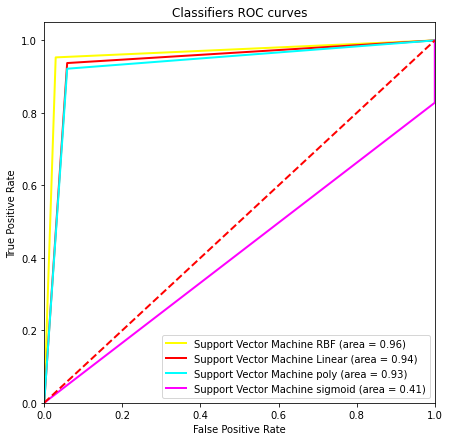

In [43]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machine RBF (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Support Vector Machine Linear (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Support Vector Machine poly (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Support Vector Machine sigmoid (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

# Random forest visualisation

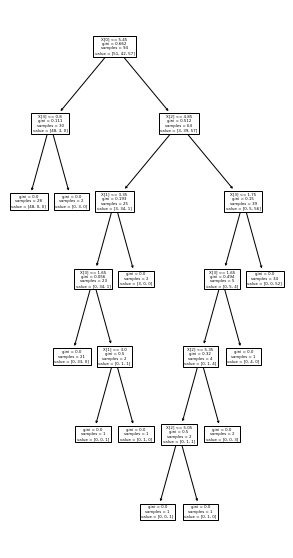

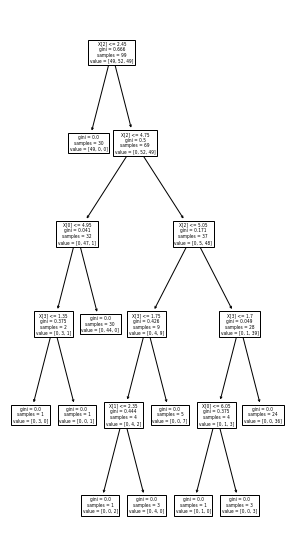

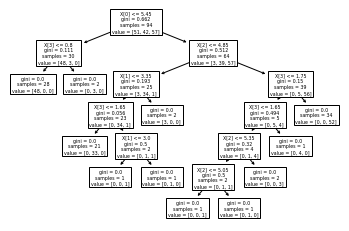

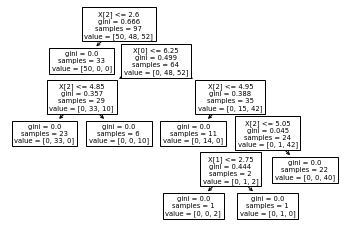

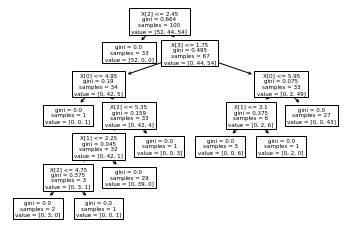

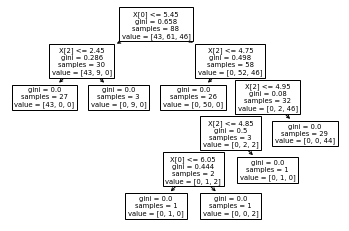

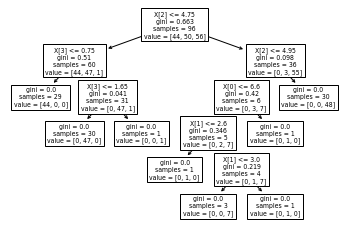

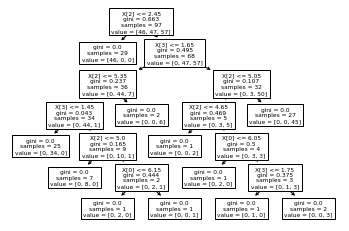

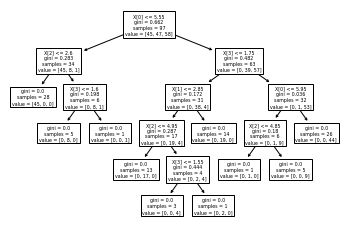

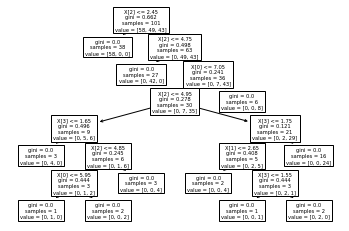

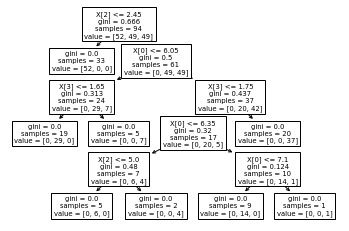

In [44]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
data = datasets.load_iris()



features = data.data
target = data.target

clf = RandomForestClassifier(n_estimators=10)
clf.fit(features,target)

clf.estimators_

plt.figure(figsize=(5,10))
tree.plot_tree(clf.estimators_[1])

plt.figure(figsize=(5,10))
for i in range(len(clf.estimators_)):
    tree.plot_tree(clf.estimators_[i])
    plt.savefig('fig'+str(i))
    plt.show()